In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import models, layers

In [2]:
# Load your two datasets
df_purchase = pd.read_csv("User_product_purchase_details_p2.csv")
df_user = pd.read_csv("user_demographics.csv")
df_purchase[:2]

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200


In [ ]:
# Display first two rows of user demographics dataset
df_user[:2]

,User_ID,Gender,Age,Occupation
0,1000001,F,0-17,10
1,1000002,M,55+,16


In [ ]:
# Merge on User_ID
df = pd.merge(df_purchase, df_user, on="User_ID", how="left")
df[:2]

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370,F,0-17,10
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200,F,0-17,10


In [6]:
# Create binary target
df["High_Value_Purchase"] = (df["Purchase"] >= 10000).astype(int)
df[:2]

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation,High_Value_Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370,F,0-17,10,0
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200,F,0-17,10,1


In [7]:
# Drop columns not needed
df = df.drop(["Product_ID"], axis=1)
df[:2]

,User_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation,High_Value_Purchase
0,1000001,A,2,0,3,NaN,NaN,8370,F,0-17,10,0
1,1000001,A,2,0,1,6.0,14.0,15200,F,0-17,10,1


In [8]:
# dummy for categorical
dummy_cols = ["Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status"]
df = pd.get_dummies(df, columns=dummy_cols, drop_first=True)
#df = df.drop(["Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status"], axis=1)

In [9]:
df[:2]

,User_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,High_Value_Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,...,Occupation_18,Occupation_19,Occupation_20,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_1
0,1000001,3,NaN,NaN,8370,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1000001,1,6.0,14.0,15200,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [10]:

# Replace missing
df = df.fillna(0)
X = df.drop(["High_Value_Purchase", "Purchase"], axis=1)
y = df["High_Value_Purchase"]
X.columns
y.value_counts()

High_Value_Purchase
0    360529
1    189539
Name: count, dtype: int64

In [11]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#Logistic Regression

# creating model
log = LogisticRegression(max_iter=2000)
# fitting model
log.fit(X_train, y_train)
# predicting
pred_lr = log.predict(X_test)
# accuracy
print("LR Accuracy:", accuracy_score(y_test, pred_lr))
# confusion matrix
print(confusion_matrix(y_test, pred_lr))

LR Accuracy: 0.7702201537986074
[[64807  7533]
 [17746 19928]]


In [ ]:
# Now using Neural Networks built with Keras
import matplotlib.pyplot as plt

# Load your two datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 2)

# Convert to numpy arrays
y_train = y_train.values
y_test = y_test.values

# Here we scale the data for better performance
scaler = StandardScaler()
# scale features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
#MLP (Keras)
#==========

# Define the model
model = models.Sequential([
    layers.Dense(6, activation='relu', kernel_initializer='uniform', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(6, activation='relu', kernel_initializer='uniform'),
    layers.Dense(1, activation='sigmoid', kernel_initializer='uniform')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=80, batch_size=1120, validation_split=0.2)

# Evaluate the model
loss, acc = model.evaluate(X_test_scaled, y_test)
print("MLP Accuracy:", acc)

Epoch 1/80


c:\Users\User\Desktop\pandas_basics\my-env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5946 - precision: 0.7017 - val_loss: 0.4924 - val_precision: 0.7701
Epoch 2/80
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4613 - precision: 0.7803 - val_loss: 0.4477 - val_precision: 0.7794
Epoch 3/80
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4323 - precision: 0.7820 - val_loss: 0.4279 - val_precision: 0.7815
Epoch 4/80
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4198 - precision: 0.7829 - val_loss: 0.4223 - val_precision: 0.7811
Epoch 5/80
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4168 - precision: 0.7832 - val_loss: 0.4213 - val_precision: 0.7807
Epoch 6/80
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4160 - precision: 0.7831 - val_loss: 0.4207 - val_precision: 0.7807
Epoch 7/80
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4154 - precision: 0.7826 - val_loss: 0.4206 - val_precision: 0.7820
Epoch 8/80
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4151 - precision: 0.7828 - val_loss: 0.

3438/3438 ━━━━━━━━━━━━━━━━━━━━ 1s 355us/step


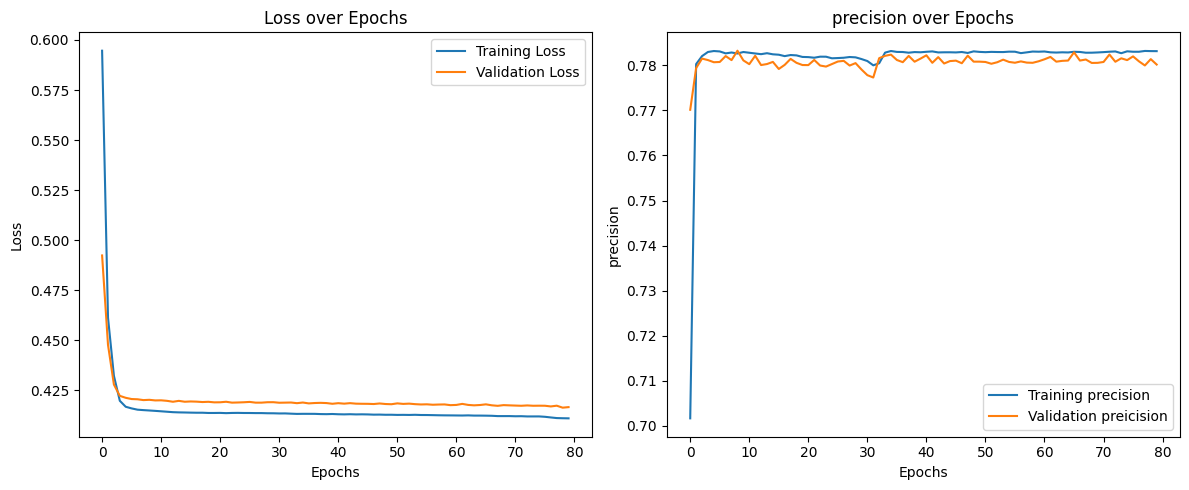

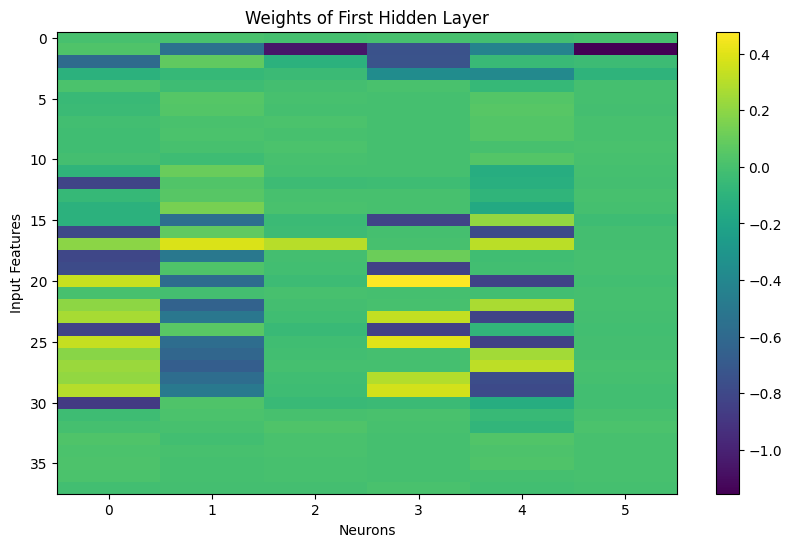

Model training complete and results visualized.


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion matrix
pd.crosstab(y_test, predictions.reshape(1,-1))
X_test_scaled.shape

# Plot the training and validation loss
plt.figure(figsize=(12, 5))

# Plot for Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['precision'], label='Training precision')
plt.plot(history.history['val_precision'], label='Validation preicision')
plt.title('precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize the weights of the first hidden layer
weights, biases = model.layers[0].get_weights()
plt.figure(figsize=(10, 6))
plt.imshow(weights, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Weights of First Hidden Layer')
plt.xlabel('Neurons')
plt.ylabel('Input Features')
plt.show()

print("Model training complete and results visualized.")


In [ ]:
# Import other classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Compare multiple models
models = []
results = []
names = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree with hyperparameter tuning', DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20, min_samples_leaf=7,
                       random_state=68)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))

In [ ]:
# Evaluate each model using K-Fold Cross-Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
for name,model in models:
    kfold = KFold(n_splits=3)
    cv_results = cross_val_score(model, X_train,y_train,cv=kfold, scoring="precision")
    results.append(cv_results)
    names.append(name)
    
    outcome = "%s: %f (%f)" % (name,cv_results.mean()*100, cv_results.std()*100)
    print(outcome)
        

Logistic Regression: 72.532936 (0.680557)
Decision Tree with hyperparameter tuning: 79.215938 (0.269784)
KNN: 76.199845 (0.171868)
GaussianNB: 57.219699 (0.274268)
Random Forest: 81.755255 (0.158870)
LDA: 67.657339 (0.407421)


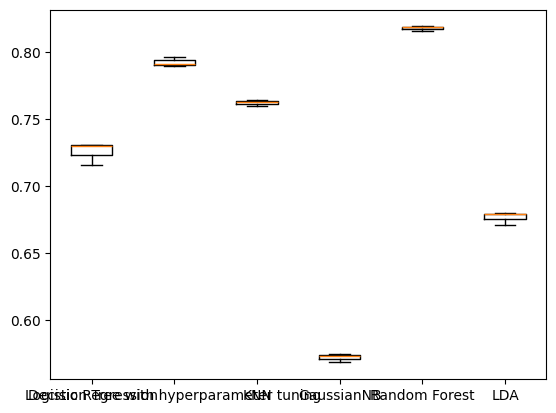

In [ ]:
# Boxplot for comparison
fig = plt.figure()
axis = fig.add_subplot(111)
plt.boxplot(results)
axis.set_xticklabels(names)
plt.show()